In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00


# **Import dan Visualisasi Data**

In [ ]:
df = pd.read_csv("/content/AirPassengers.csv")
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df = df.set_index(['Month'])
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


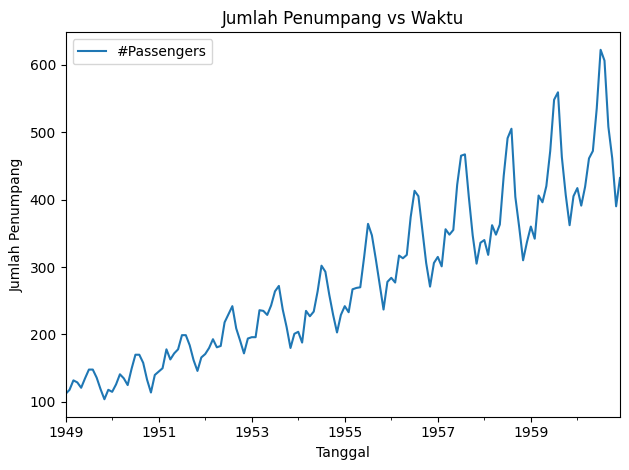

In [ ]:
# Visualisasi Data
df.plot()
plt.title("Jumlah Penumpang vs Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penumpang")
plt.tight_layout()
plt.show()

# **Dekomposisi Time Series**
Menggunakan dekomposisi multiplicative untuk memisahkan data ke dalam komponen trend, seasonal, dan residual.

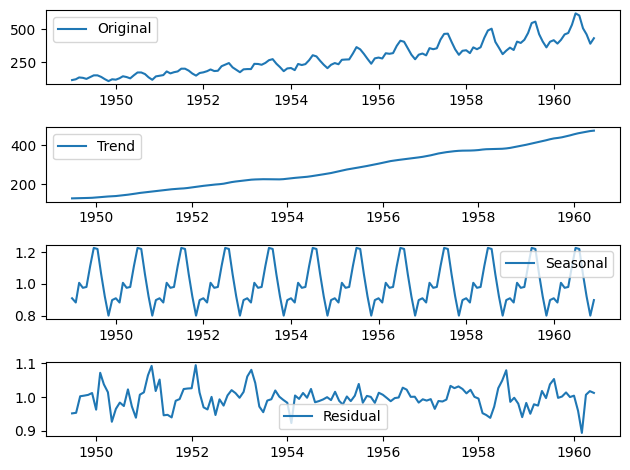

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df, model='multiplicative')
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid
# Plot the original time series
plt.subplot(411)
plt.plot(df, label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# **Plot ACF dan PACF**

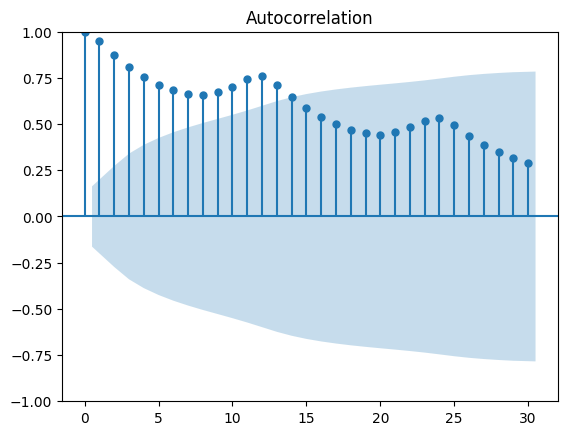

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
data = df['#Passengers']
plot_acf(data, lags=30)
plt.show()

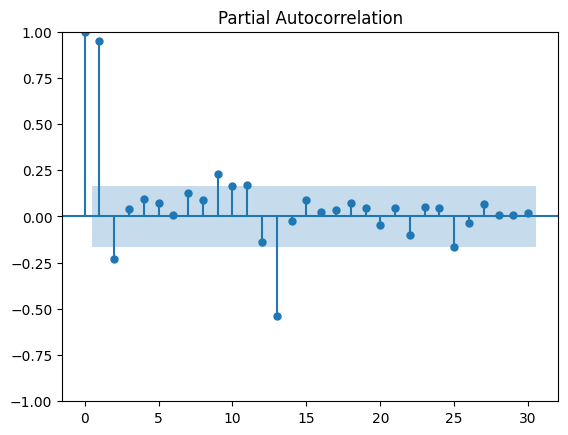

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
data = df['#Passengers']
plot_pacf(data, lags=30)
plt.show()

# **Plot data setelah melakukan differencing untuk menghilangkan trend dan seasonality.**

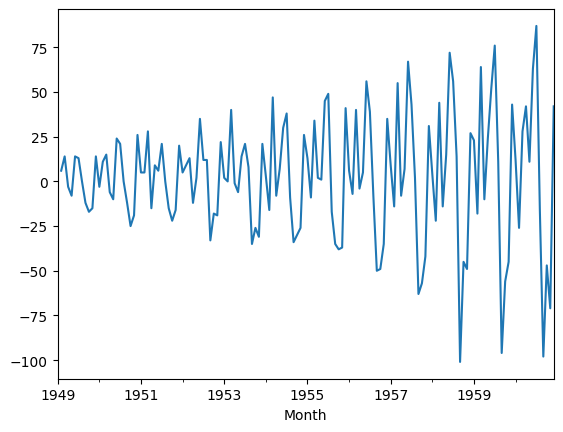

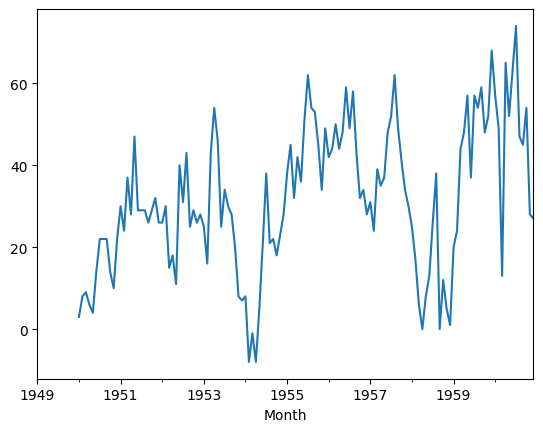

In [ ]:
df['#Passengers'].diff().plot()
plt.show()
df['#Passengers'].diff(12).plot()
plt.show()

# **Uji Stasioneritas dengan ADF**

In [ ]:
# Perform Dickey-Fuller test
result = adfuller(df['#Passengers'].diff(12)[12:])

# Extract and print the test statistic
print('Test Statistic:', result[0])

# Extract and print the p-value
print('p-value:', result[1])

# Extract and print the critical values
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

Test Statistic: -3.383020726492481
p-value: 0.011551493085514952
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


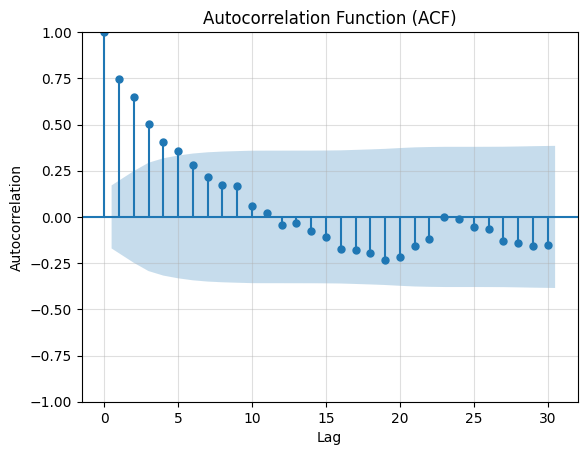

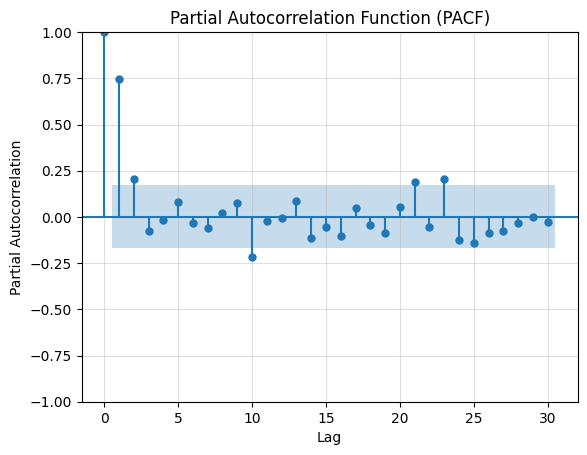

In [ ]:
data = df['#Passengers'].diff(12)
data = data[12:]
# Plot the ACF
plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()

data = df['#Passengers'].diff(12)
data = data[12:]

# Plot the ACF
plot_pacf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(alpha = 0.4)
plt.show()

# **Penentuan Model ARIMA Seasonal**

In [ ]:
arima_model=auto_arima(df["#Passengers"],
                       start_p=1,d=1,start_q=1,
                       max_p=4,max_q=4,max_d=4,m=12,
                       start_P=1,D=1,start_Q=1,max_P=4,max_D=4,max_Q=4,
                       seasonal=True,
                       trace=True,
                       error_action="ignore",
                       stepwise=True,
                       n_fits=20)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.37 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1020.582, Time=0.81 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.85 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=4.97 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.27 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.53 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.67 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.40 sec
 ARIMA(0,1,1)(1,1,0)[12]     

# **Penaksiran Parameter**

In [ ]:
model = SARIMAX(df['#Passengers'],
                order=(0,1,1),
                seasonal_order=(2,1,0,12))

# Fit model
result = model.fit()

# Ringkasan hasil model
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                         #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 11 Jun 2024   AIC                           1019.178
Time:                                     14:47:52   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

# **Model Diagnostic**

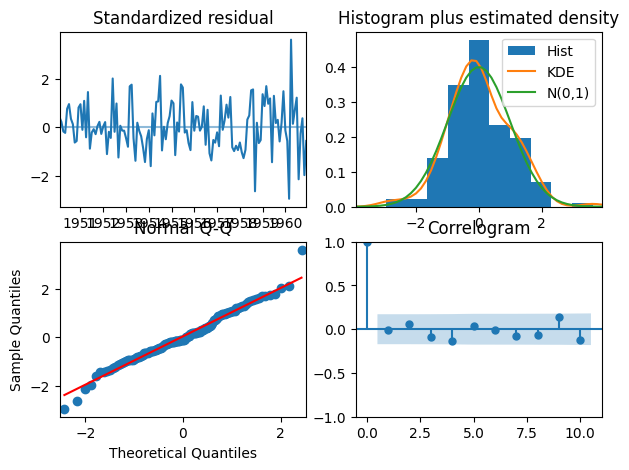

In [ ]:
arima_model.plot_diagnostics(figsize=(7,5))
plt.show()

# **Forecasting**

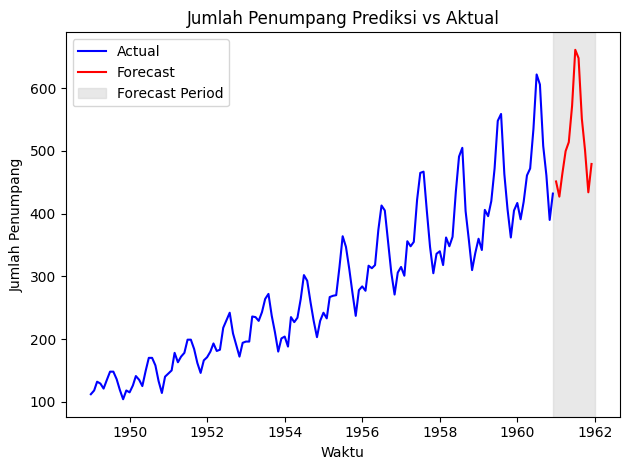

In [ ]:
# Forecast hingga 12 bulan ke depan
prediction = arima_model.predict(n_periods=12)

# Plot hasil prediksi
plt.plot(df.index, df['#Passengers'], color='blue', label='Actual')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), prediction, color='red', label='Forecast')

# Membuat plot untuk periode prediksi
plt.axvspan(df.index[-1], pd.date_range(df.index[-1], periods=13, freq='M')[-1], color='lightgray', alpha=0.5, label='Forecast Period')

plt.legend()
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Penumpang Prediksi vs Aktual')
plt.tight_layout()
plt.show()

In [ ]:
forecast = result.get_forecast(steps=12)
forecast_index = pd.date_range(df.index[-1], periods=13, freq='M')[1:]
forecast_values = forecast.predicted_mean

print("Prediksi untuk 12 bulan ke depan:")
forecast_df = pd.DataFrame({'Bulan': forecast_index, 'Prediksi Penumpang': forecast_values})
print(forecast_df)

Prediksi untuk 12 bulan ke depan:
                Bulan  Prediksi Penumpang
1961-01-01 1961-01-31          451.347077
1961-02-01 1961-02-28          427.102222
1961-03-01 1961-03-31          463.382490
1961-04-01 1961-04-30          499.705771
1961-05-01 1961-05-31          514.035526
1961-06-01 1961-06-30          571.851868
1961-07-01 1961-07-31          661.310509
1961-08-01 1961-08-31          648.081675
1961-09-01 1961-09-30          551.284692
1961-10-01 1961-10-31          501.068280
1961-11-01 1961-11-30          434.052984
1961-12-01 1961-12-31          479.233768
